In [1]:
pip install nba_api

Note: you may need to restart the kernel to use updated packages.


### Get 2022-23 csv

In [15]:
# retrieve detailed shot chart data using 'shotchartdetail' module
from nba_api.stats.endpoints import shotchartdetail
import json
import pandas as pd

response = shotchartdetail.ShotChartDetail(
    team_id=0, #fetch data for all teams
    player_id=0, #fetch data for all players
    season_nullable='2010-11', #look at the 2021-22 season.
    context_measure_simple = 'FGA', #fetch data related to Field Goal Attempts
    season_type_all_star='Regular Season' #fetch data for the Regular Season.
)

# Convert the response to JSON format and then load it into a Python dictionary
content = json.loads(response.get_json())

results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']

# Convert the extracted data into a pandas DataFrame
df = pd.DataFrame(rows, columns=headers)
df.columns = headers

In [16]:
df.to_csv('2010-11.csv', index=False)

### Draw court

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw Basketball Court
from matplotlib.patches import Circle, Rectangle, Arc
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the basketball hoop
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    
    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                            fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                            fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                            linewidth=lw, color=color, fill=False)
    
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                        color=color)
    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                                color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                        color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                            linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                        bottom_free_throw, restricted, corner_three_a,
                        corner_three_b, three_arc, center_outer_arc,
                        center_inner_arc]

    if outer_lines:
    # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                    color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

## Try get one team chart

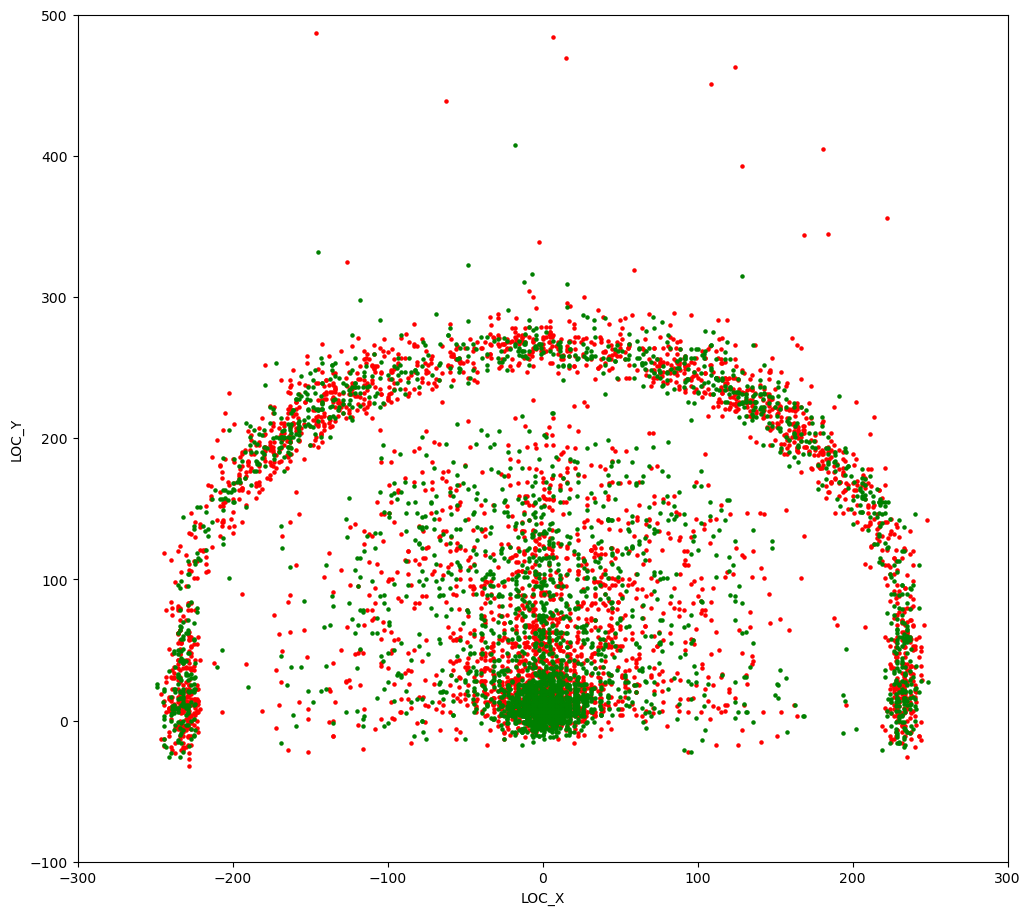

In [8]:
phily_df = df[df['TEAM_NAME'] == 'Philadelphia 76ers']

plt.figure(figsize=(12, 11))

# Filter dataframe for "Missed Shot" and plot for the current player
missed_shot = phily_df[phily_df['EVENT_TYPE'] == 'Missed Shot']
plt.scatter(missed_shot.LOC_X, missed_shot.LOC_Y, s=5, c='red', label='Missed Shot')

# Filter dataframe for "Made Shot" and plot for the current player
made_shot = phily_df[phily_df['EVENT_TYPE'] == 'Made Shot']
plt.scatter(made_shot.LOC_X, made_shot.LOC_Y, s=5, c='green', label='Made Shot')

# Set the axis limits
plt.xlim(-300, 300)
plt.ylim(-100, 500)
    
# Set x and y axis labels
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')

# Show the plot
plt.show()

### Combine the 2 Chart together

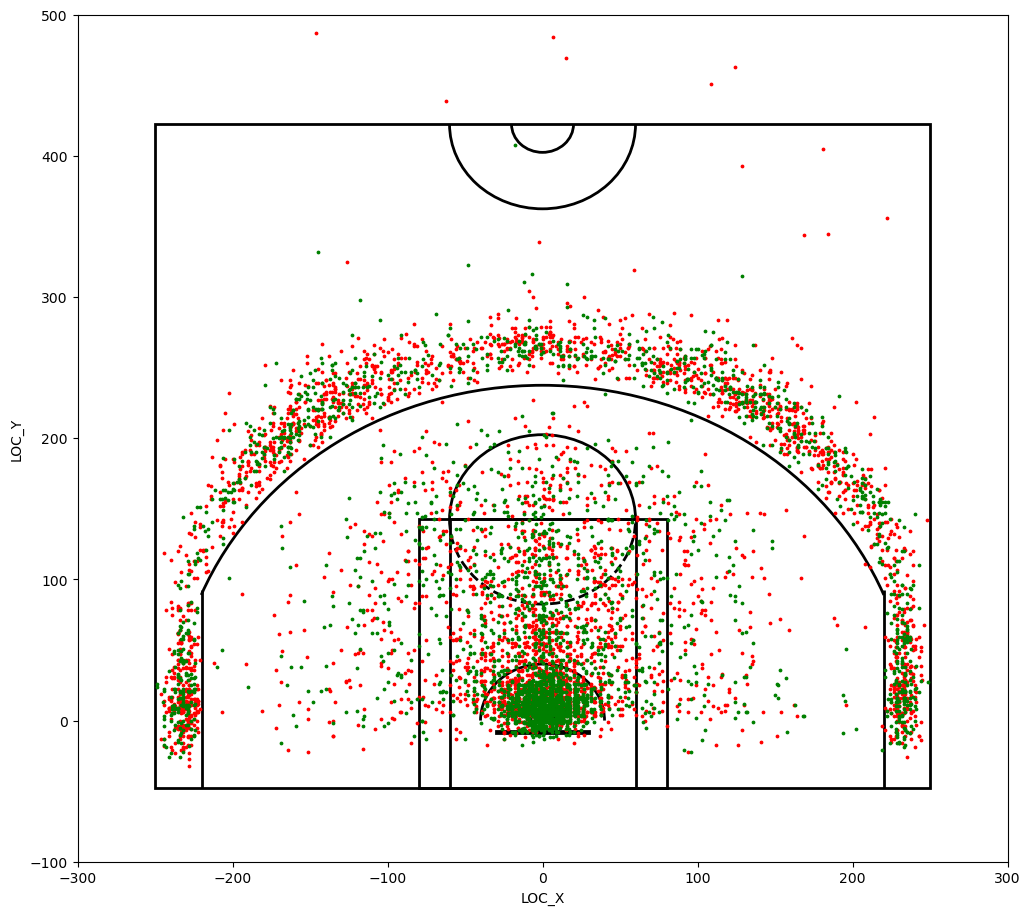

In [11]:
plt.figure(figsize=(12, 11))

draw_court(outer_lines=True)

# Filter dataframe for "Missed Shot" and plot for the current player
missed_shot = phily_df[phily_df['EVENT_TYPE'] == 'Missed Shot']
plt.scatter(missed_shot.LOC_X, missed_shot.LOC_Y, s=3, c='red', label='Missed Shot')

# Filter dataframe for "Made Shot" and plot for the current player
made_shot = phily_df[phily_df['EVENT_TYPE'] == 'Made Shot']
plt.scatter(made_shot.LOC_X, made_shot.LOC_Y, s=3, c='green', label='Made Shot')

# Set the axis limits
plt.xlim(-300, 300)
plt.ylim(-100, 500)
    
# Set x and y axis labels
plt.xlabel('LOC_X')
plt.ylabel('LOC_Y')

# Show the plot
plt.show()

### Loop and get all teams

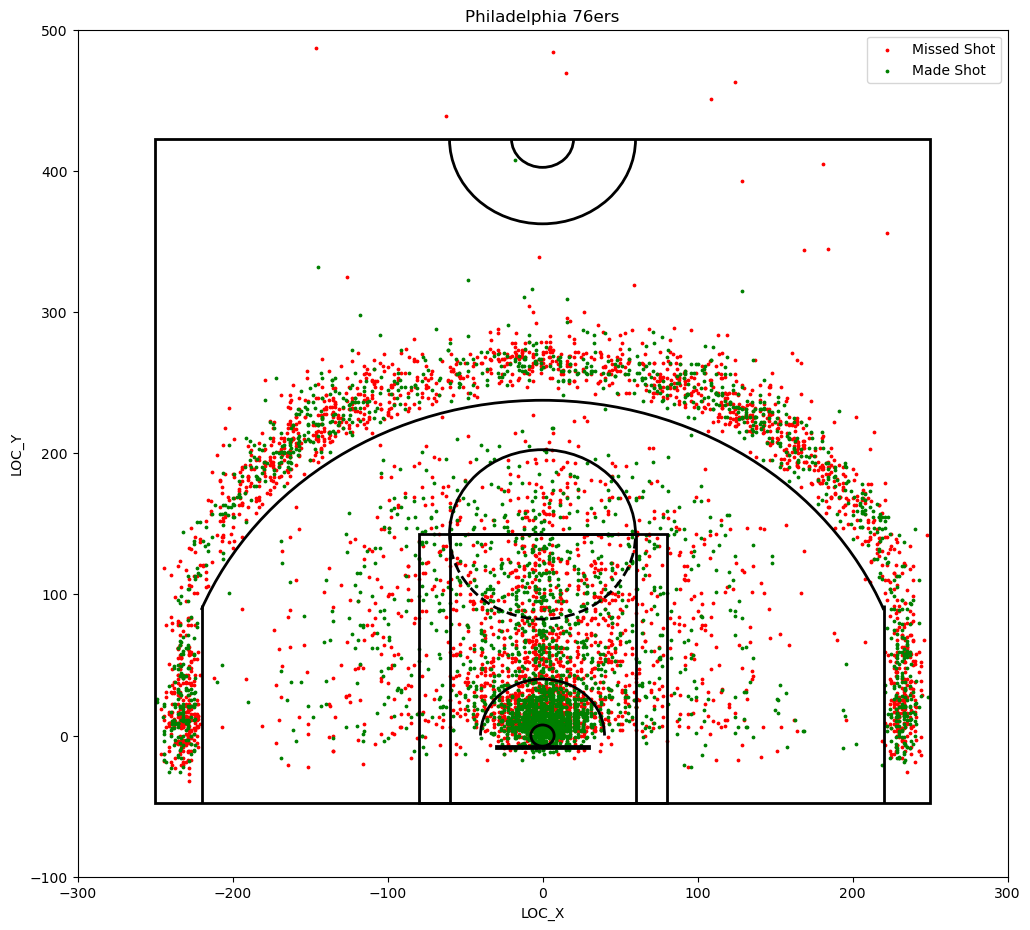

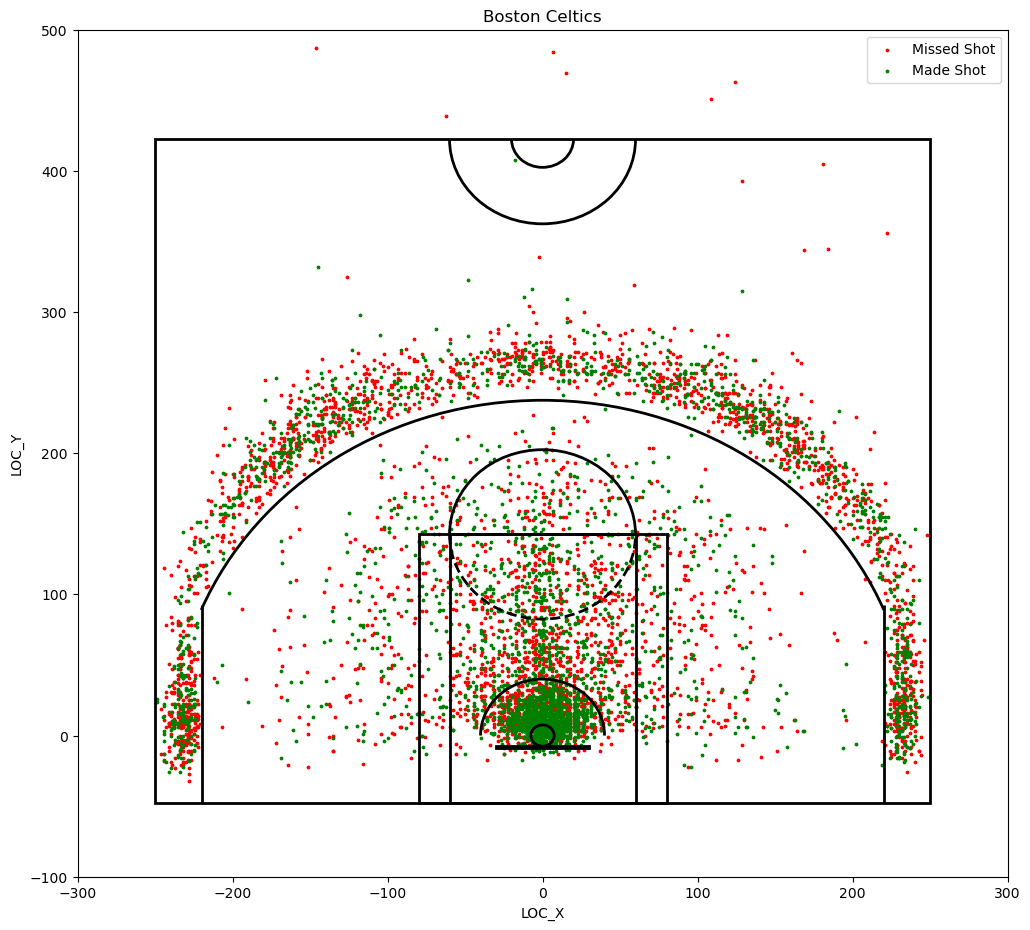

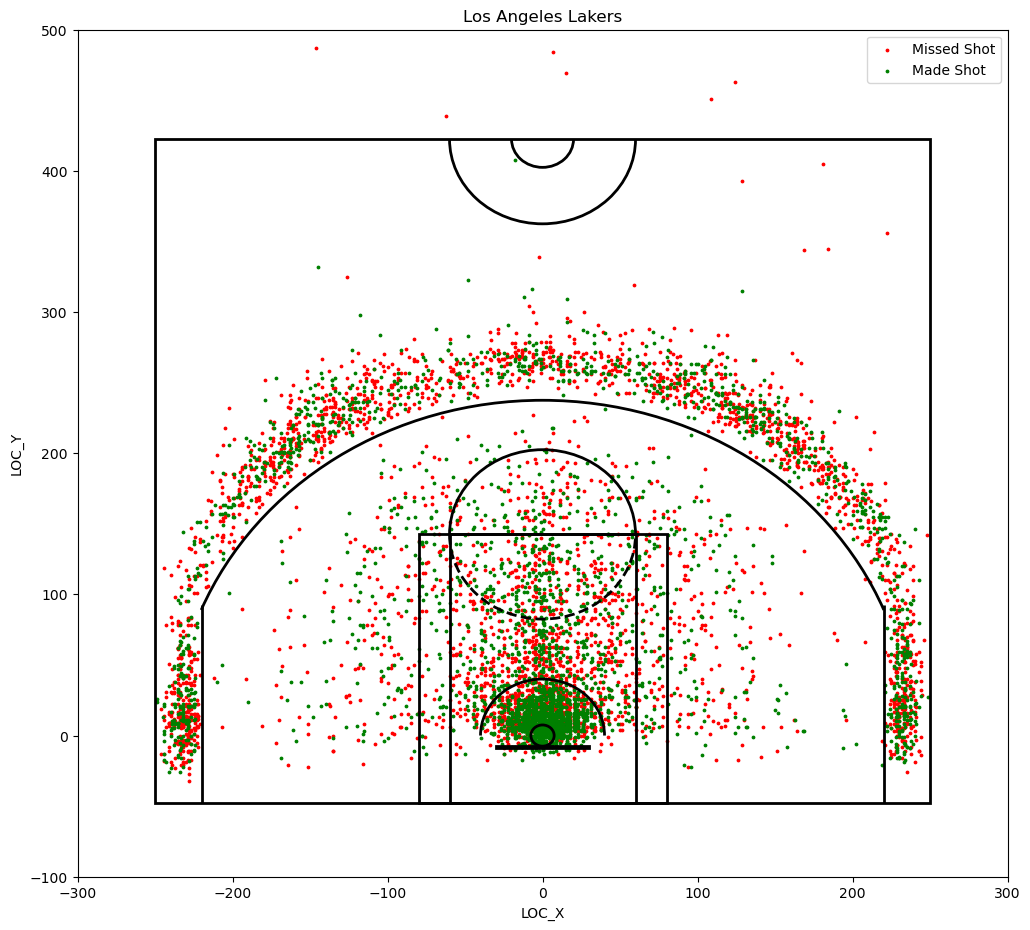

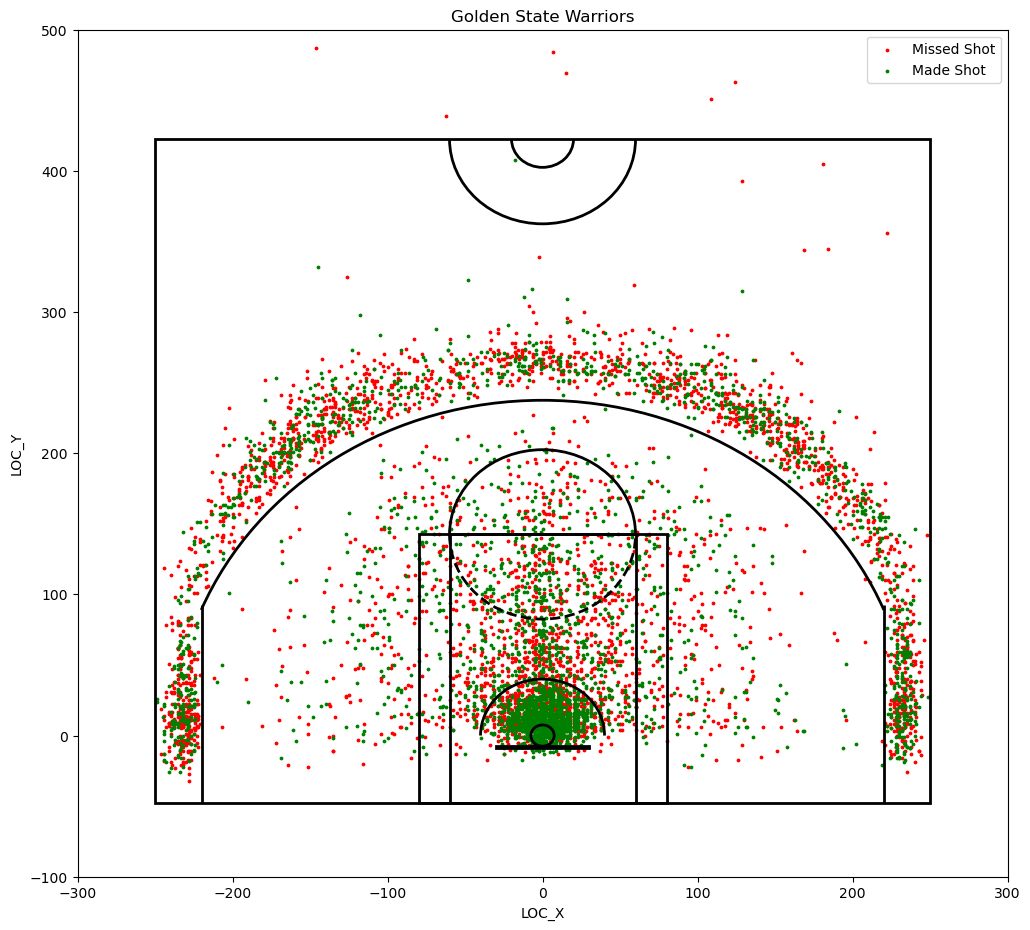

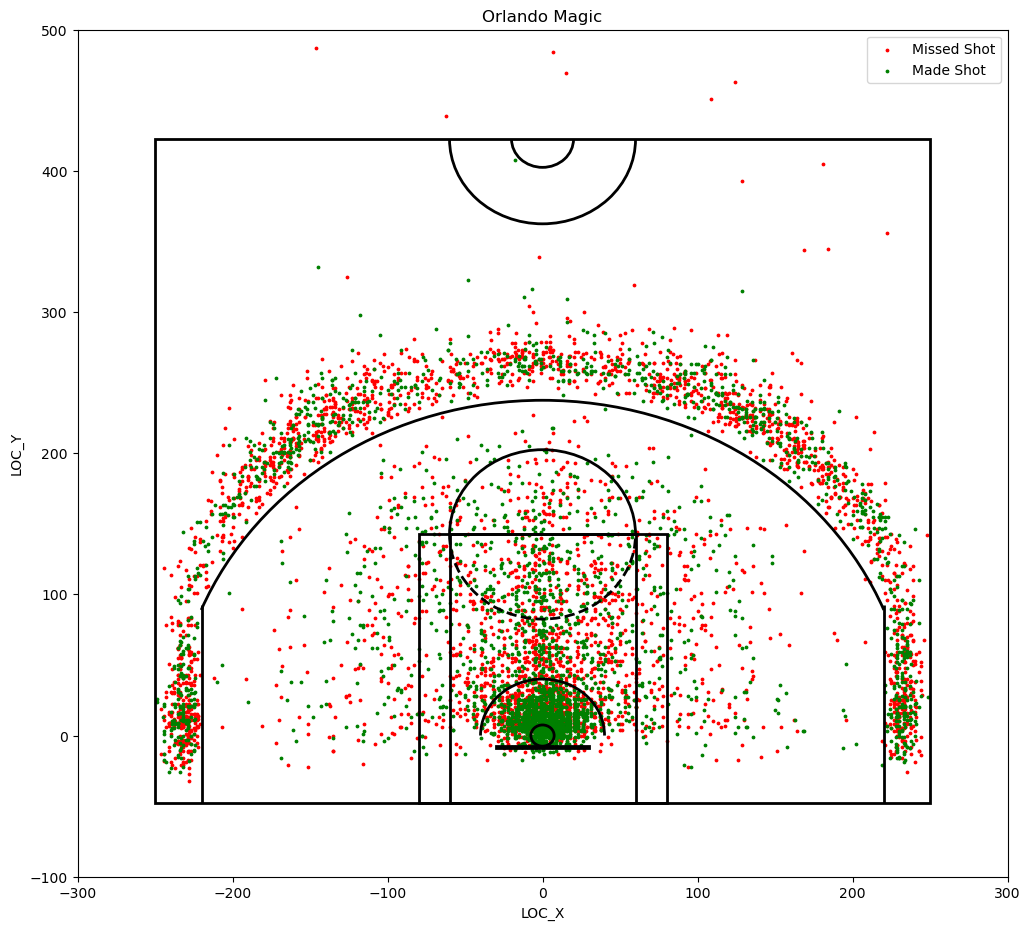

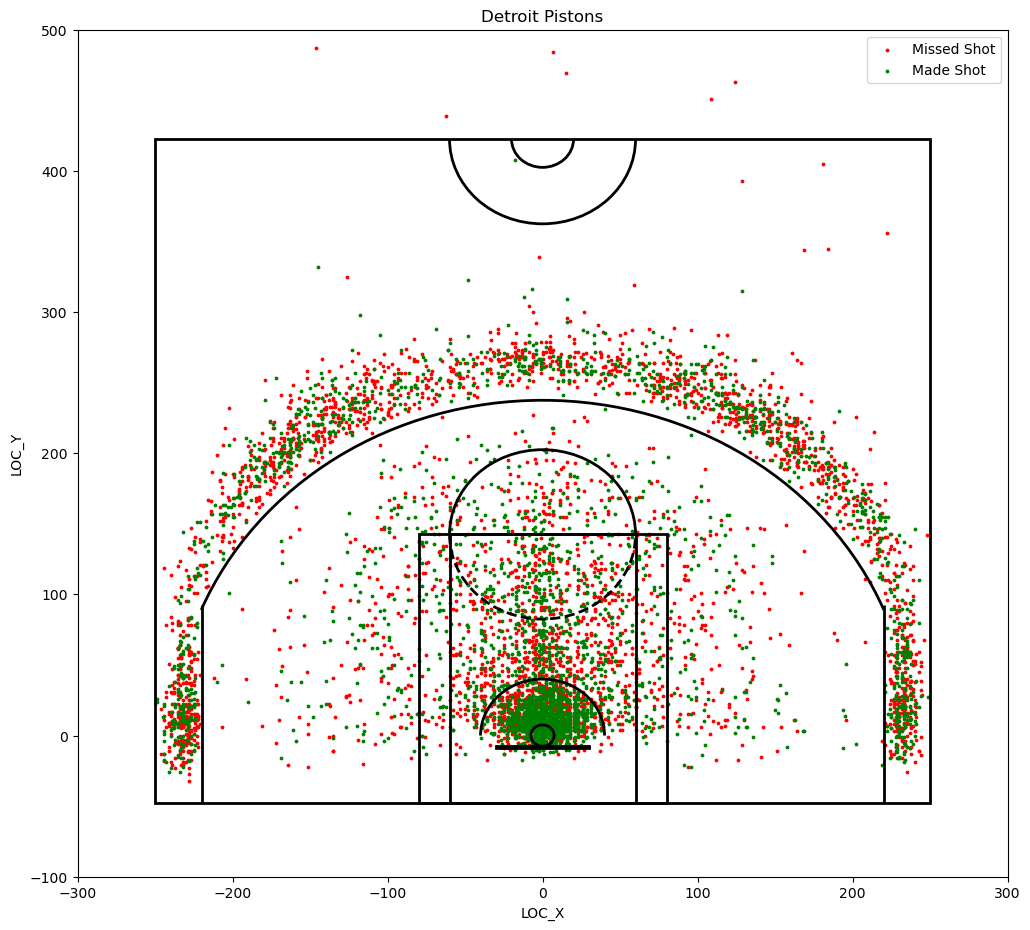

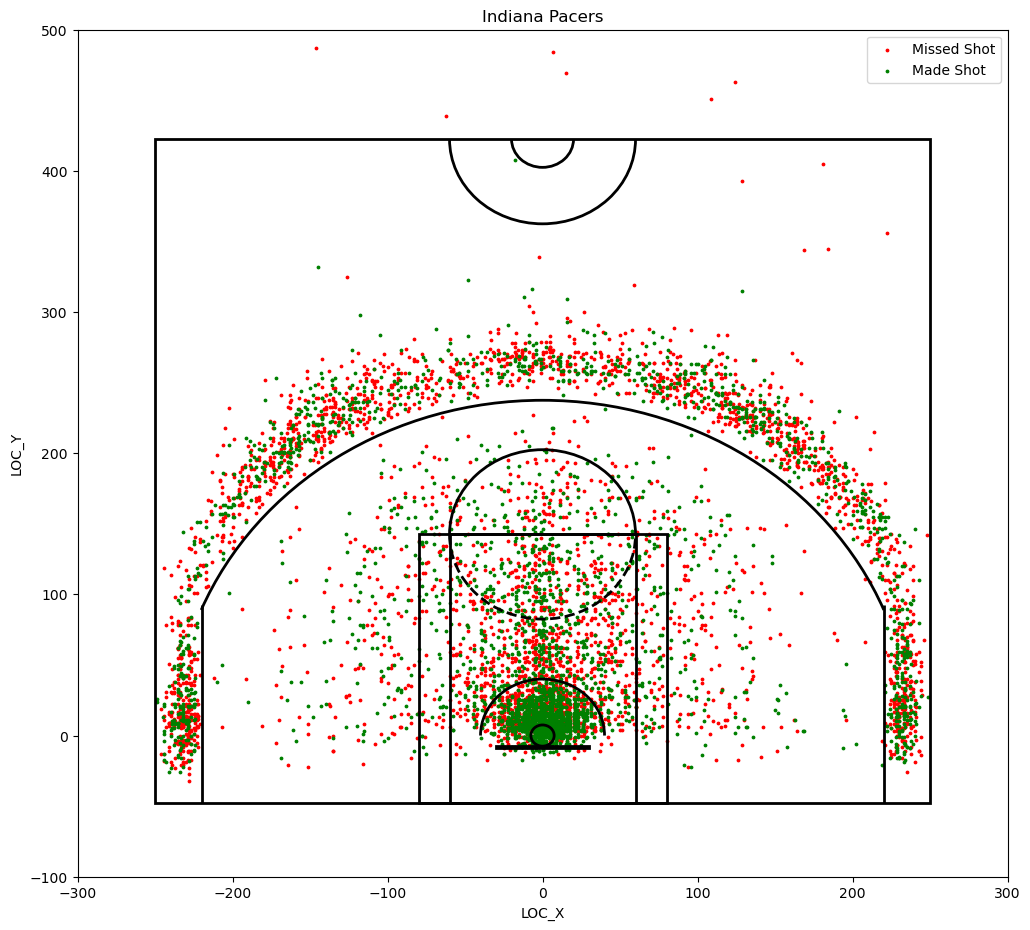

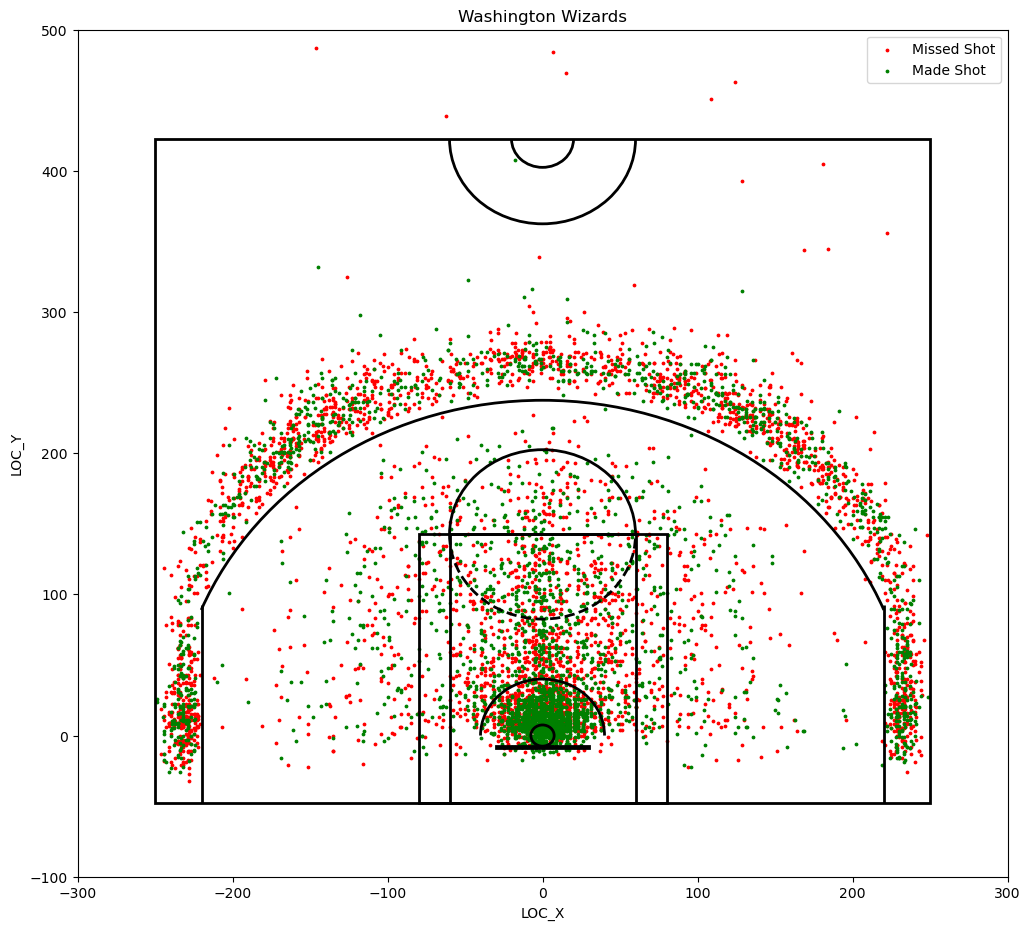

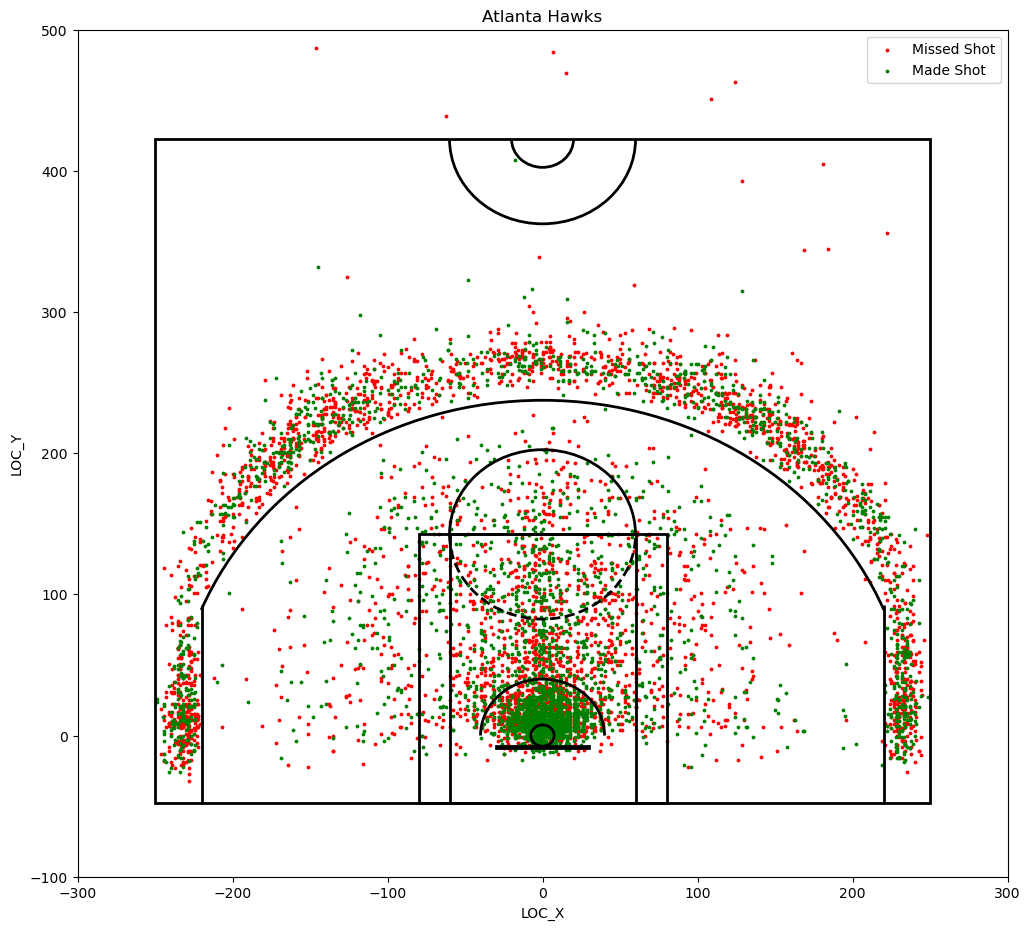

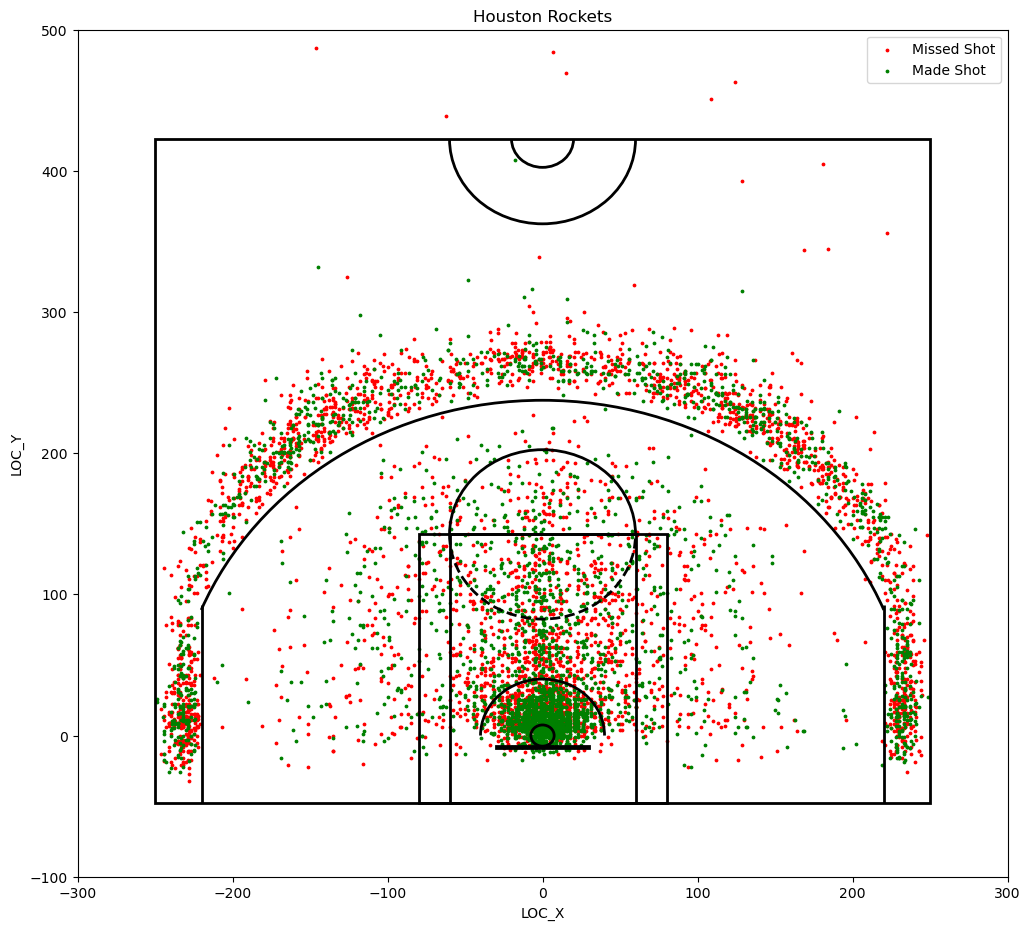

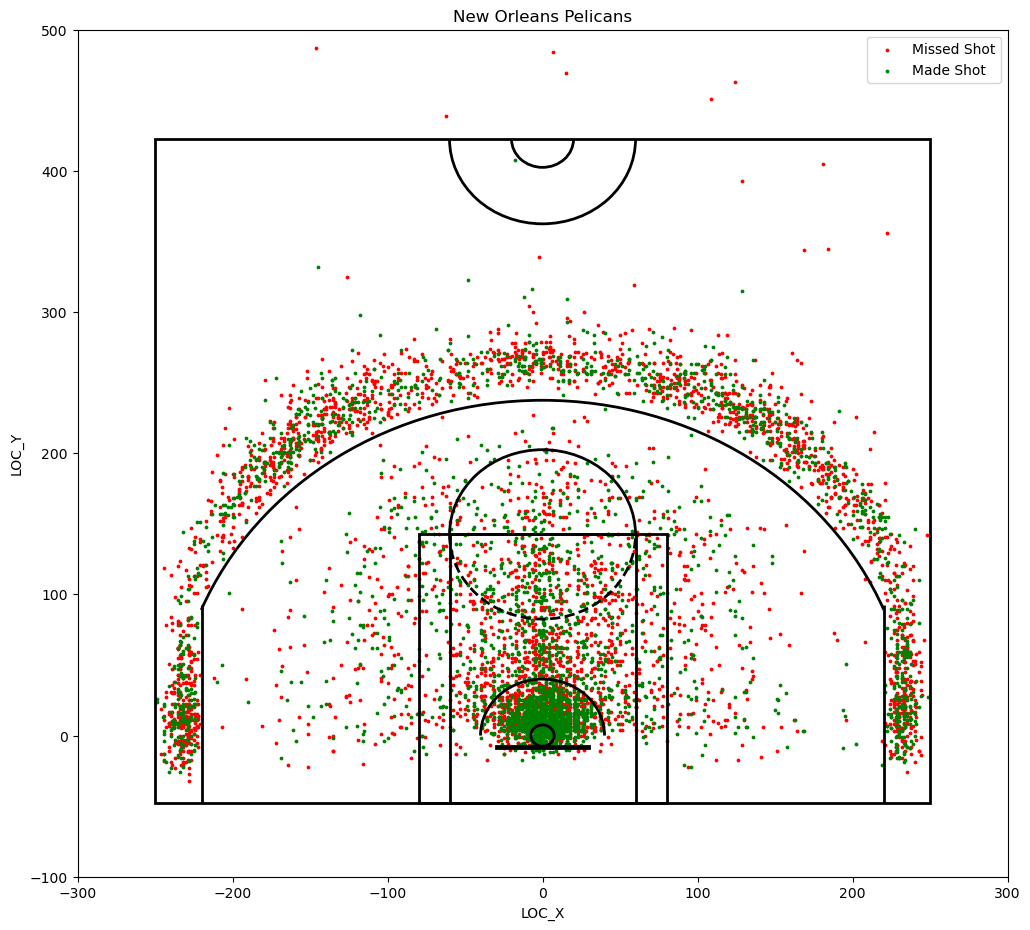

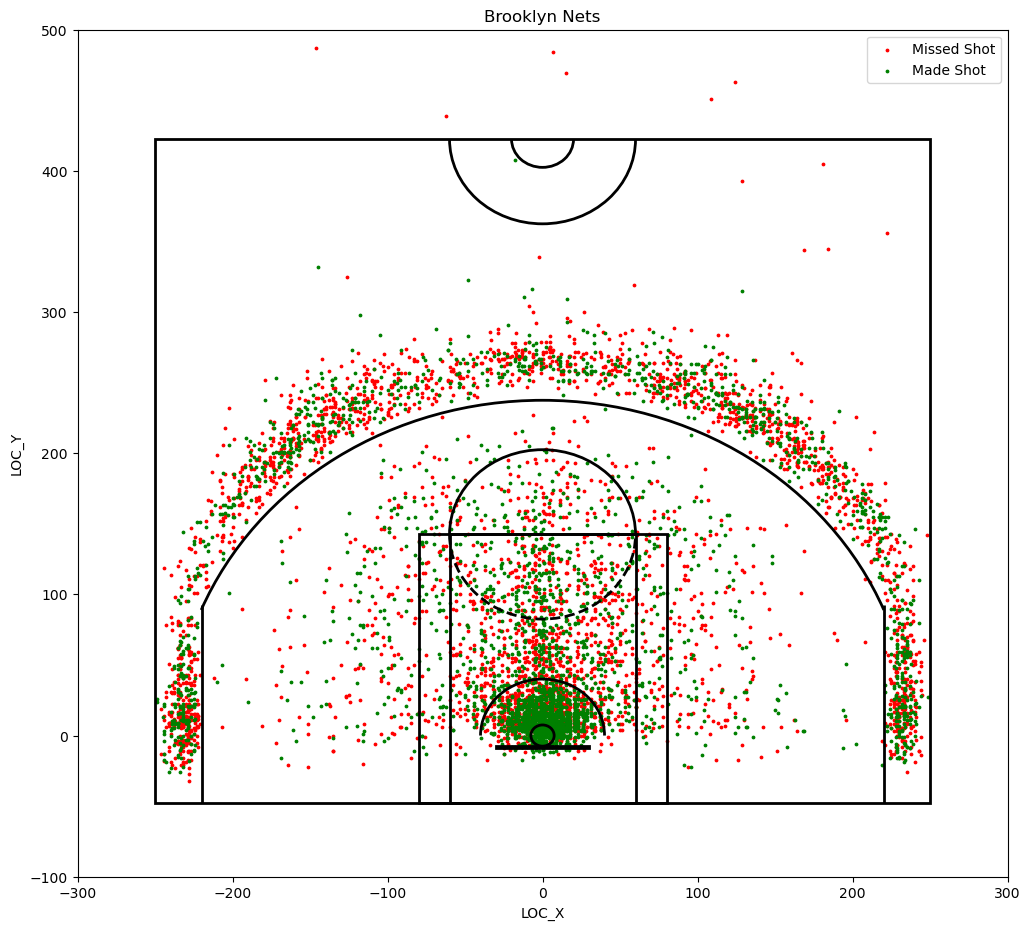

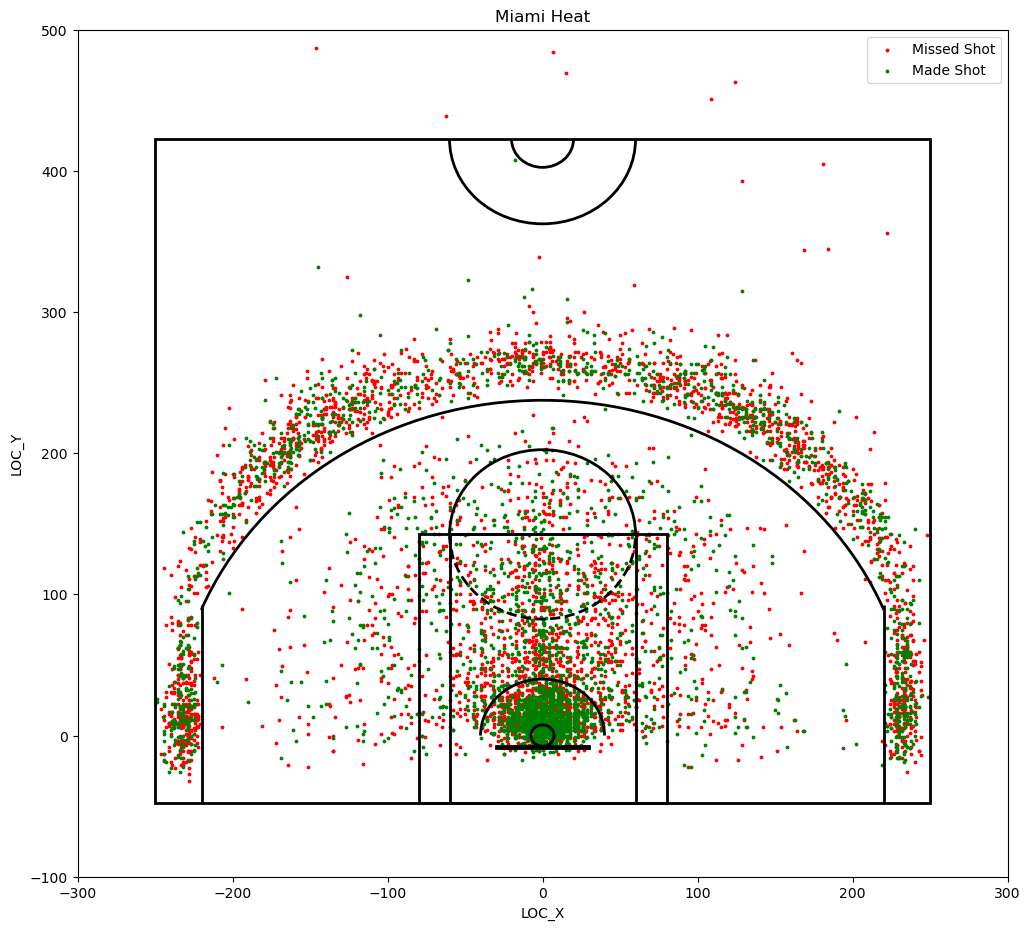

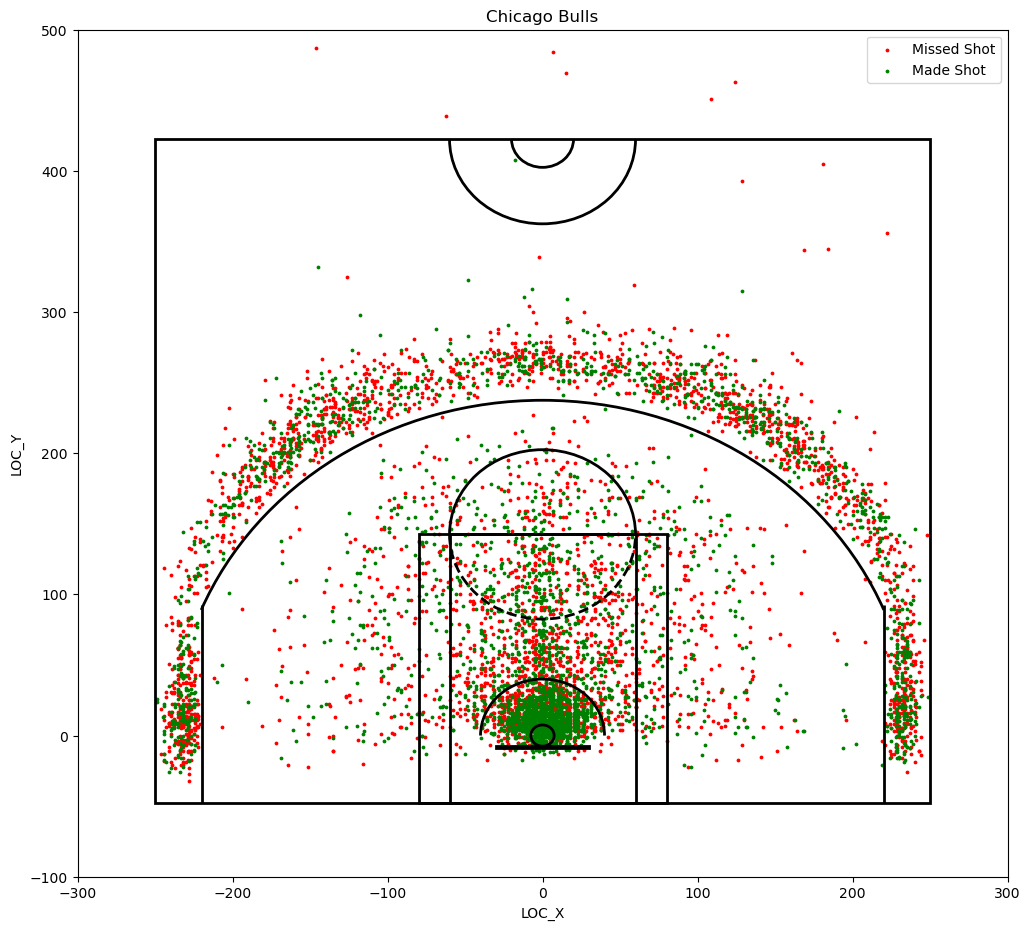

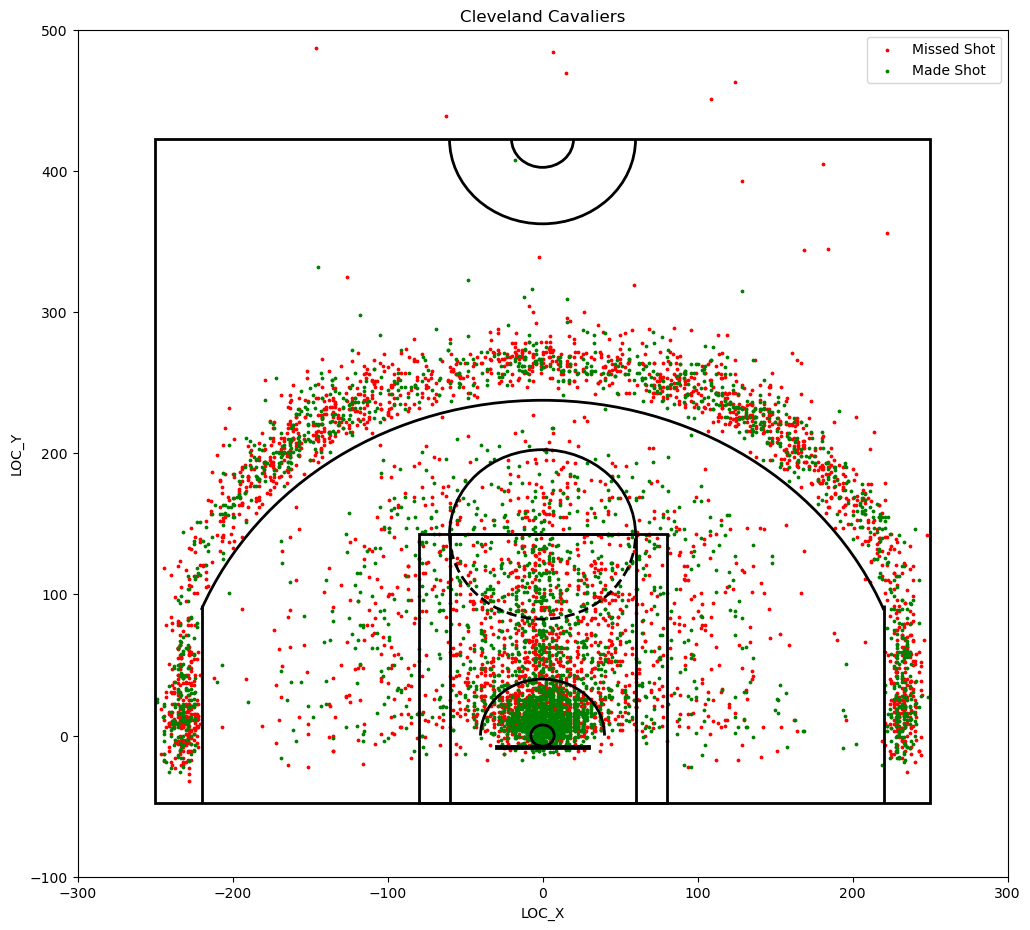

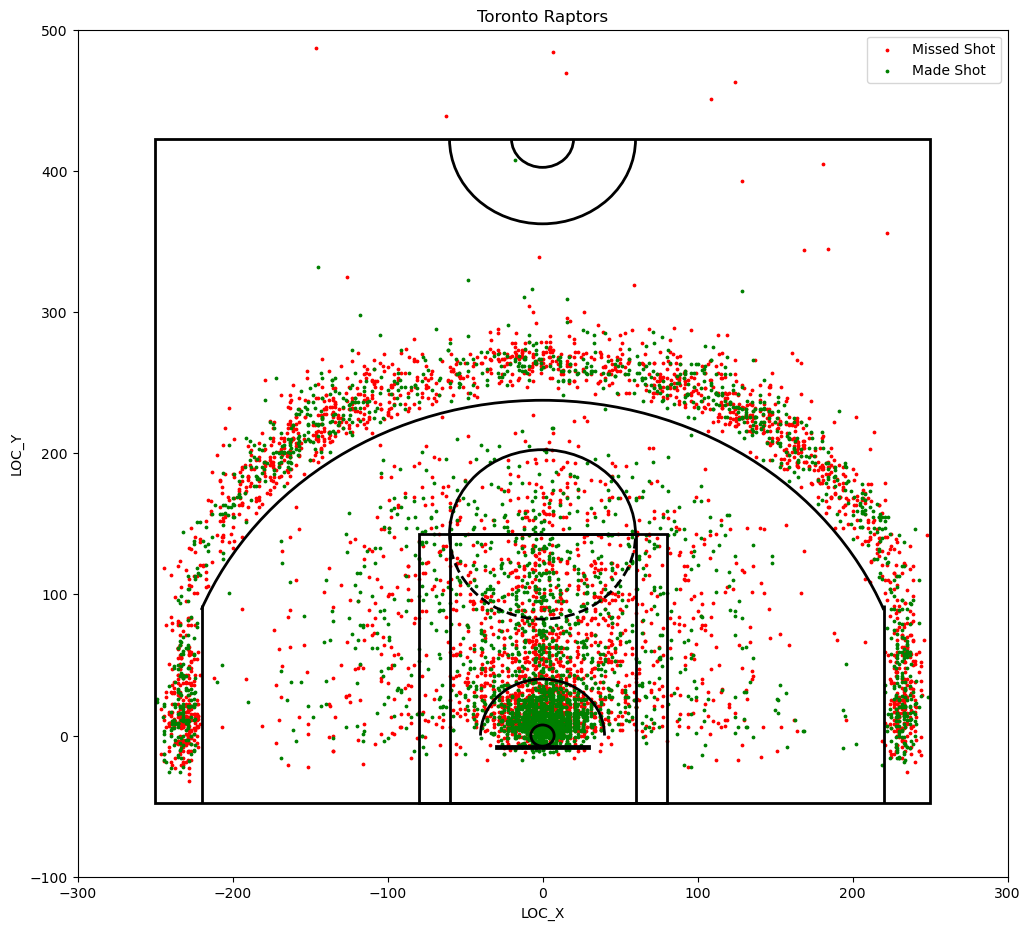

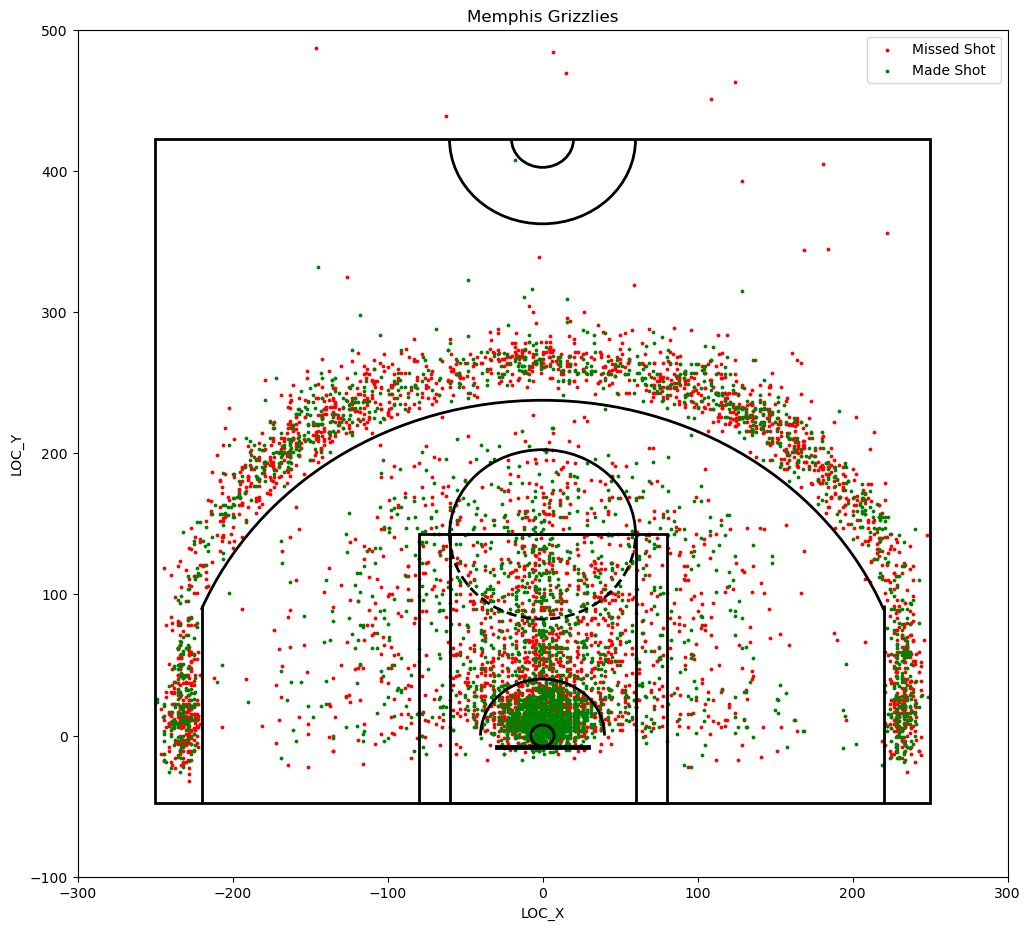

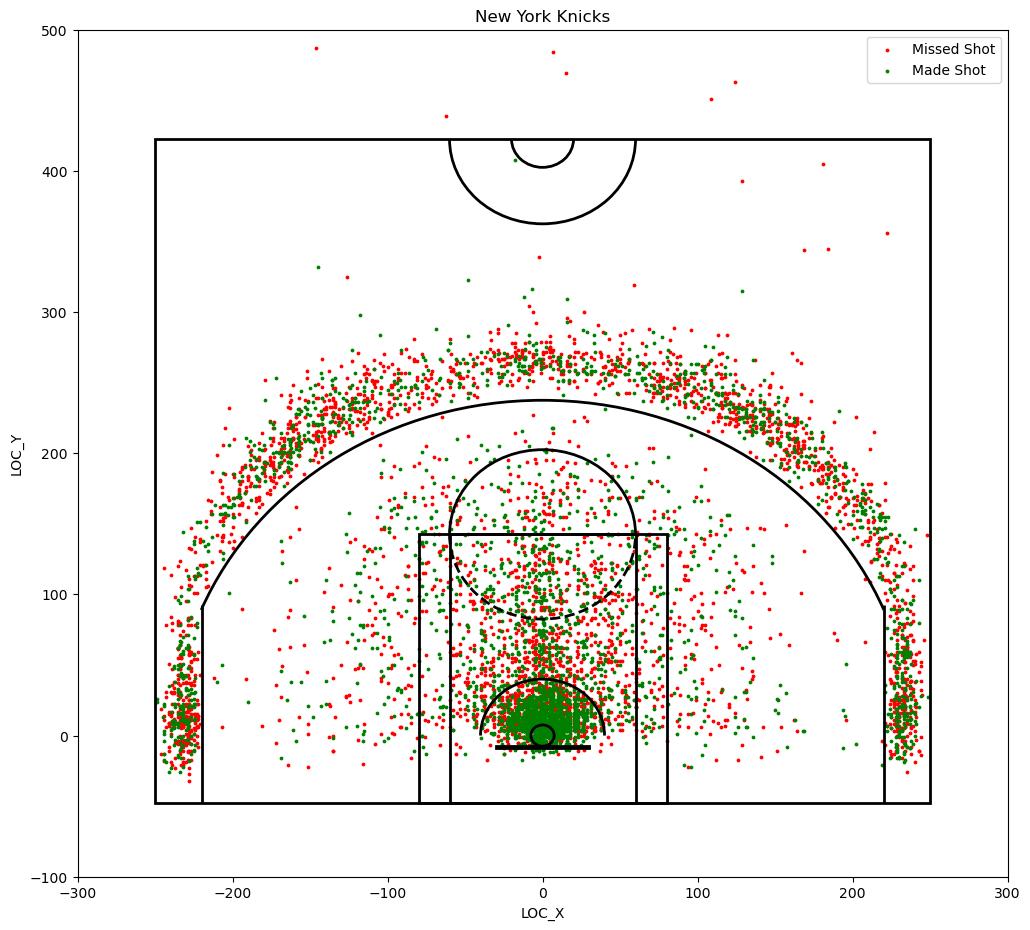

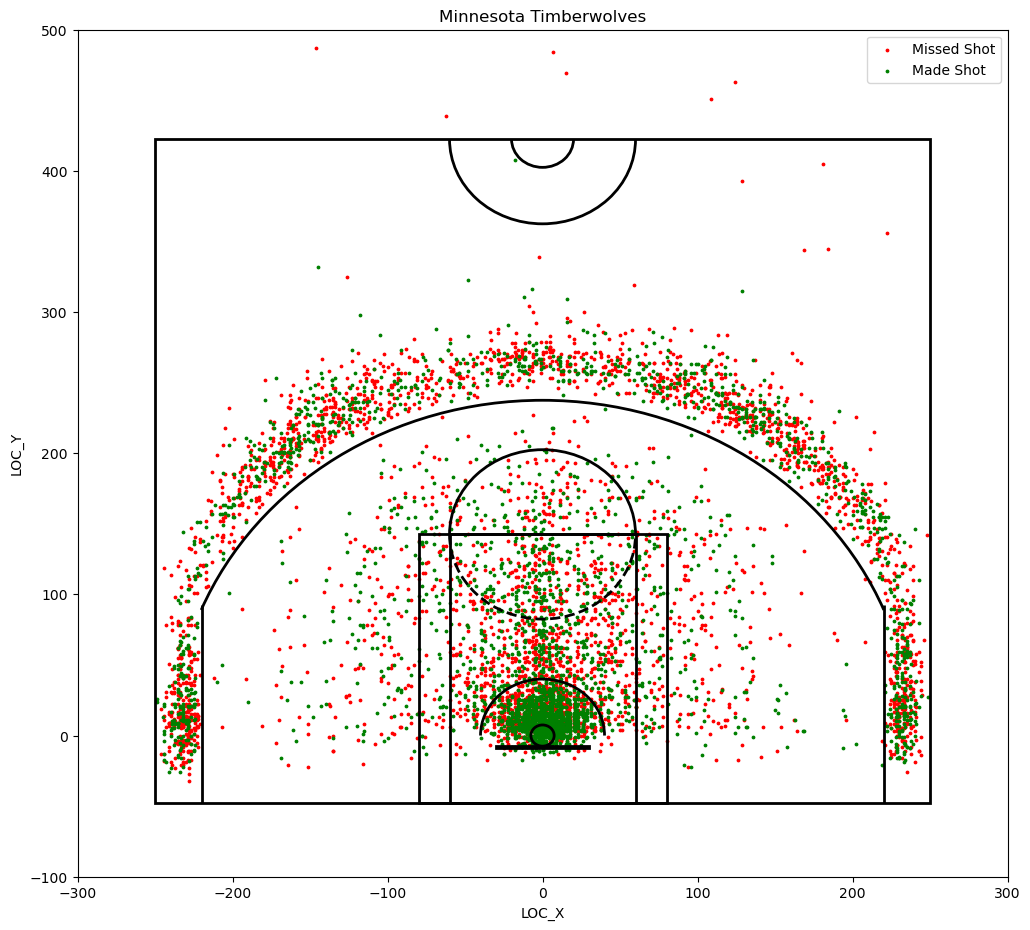

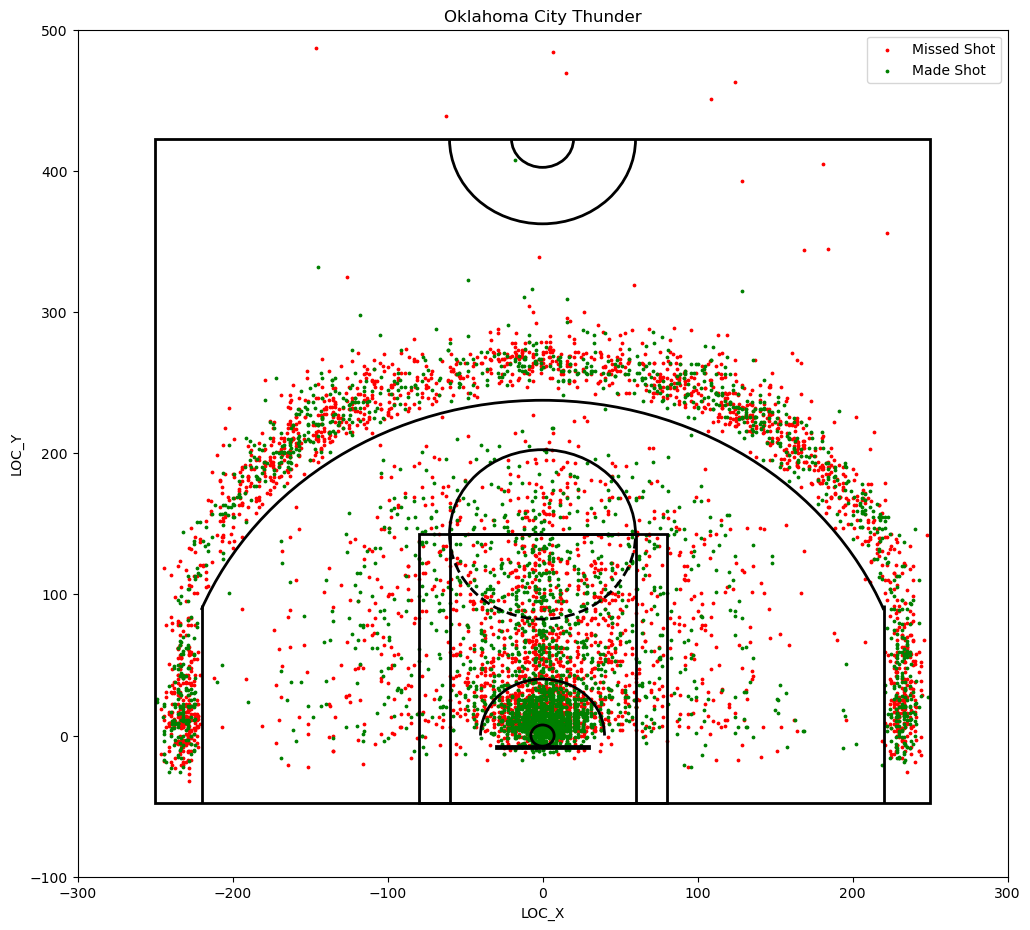

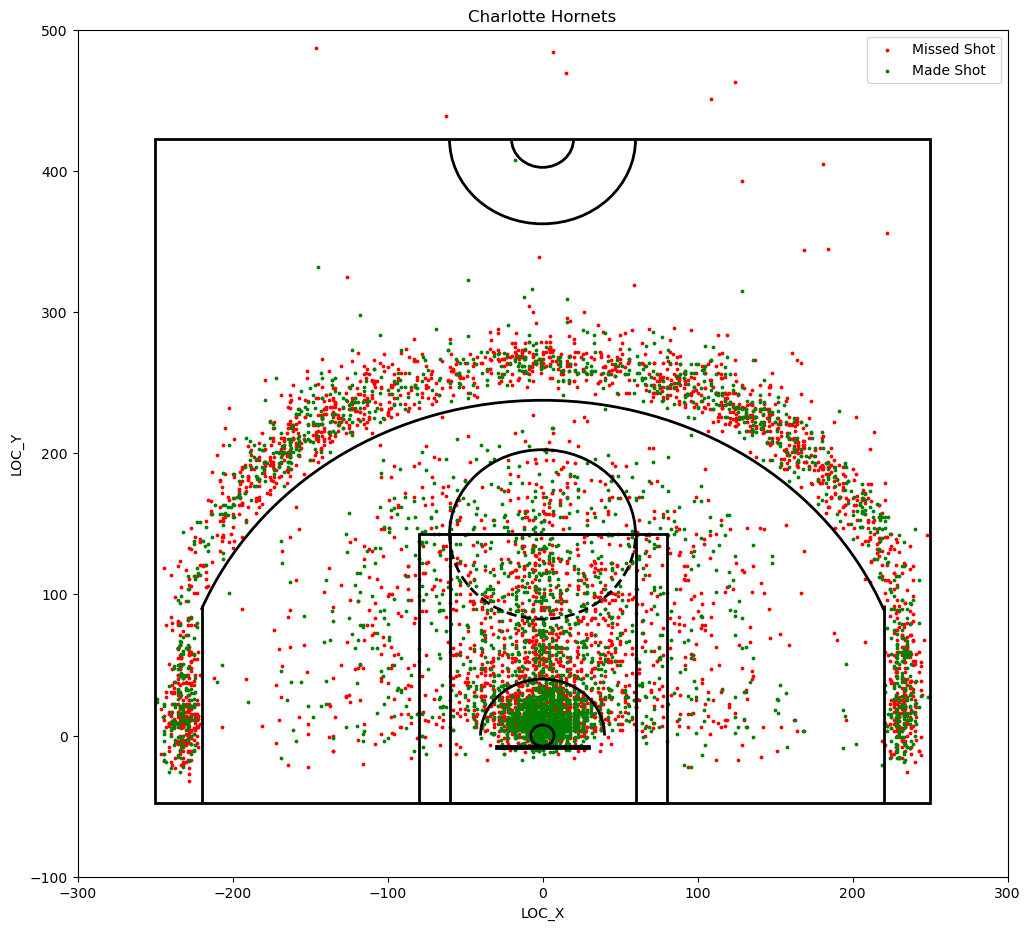

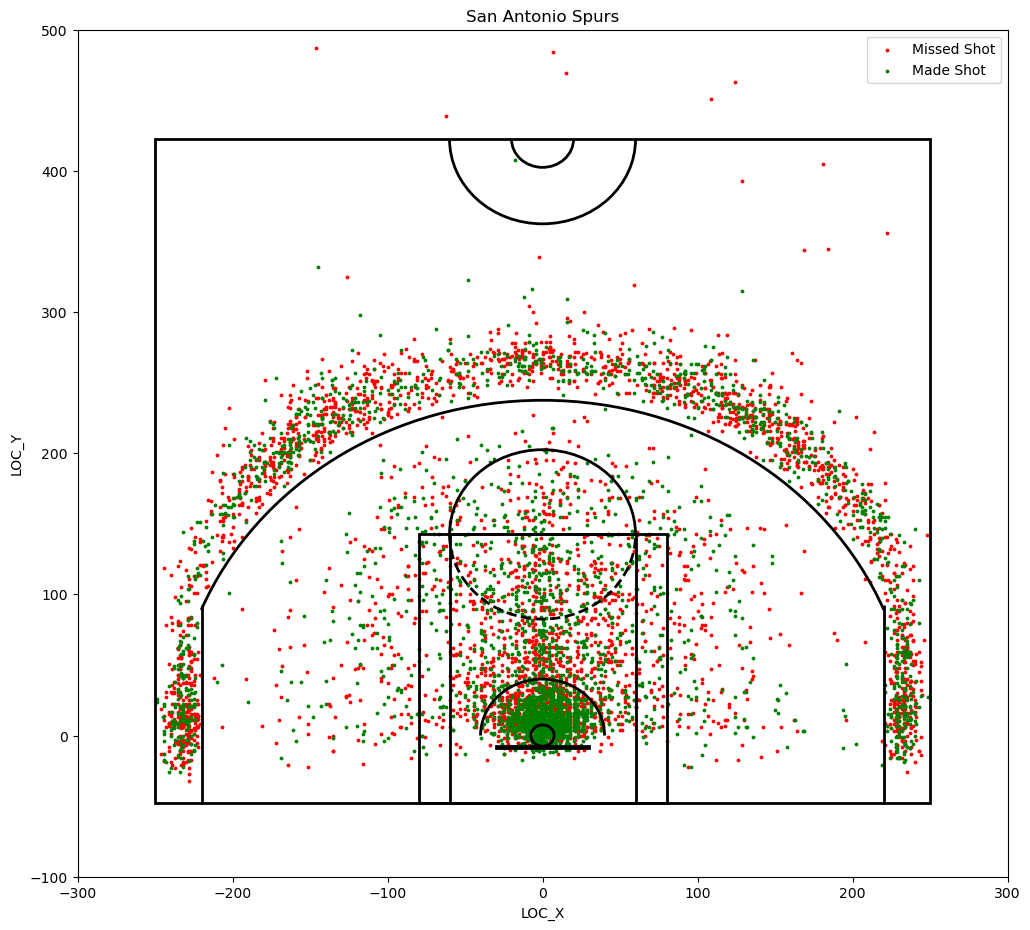

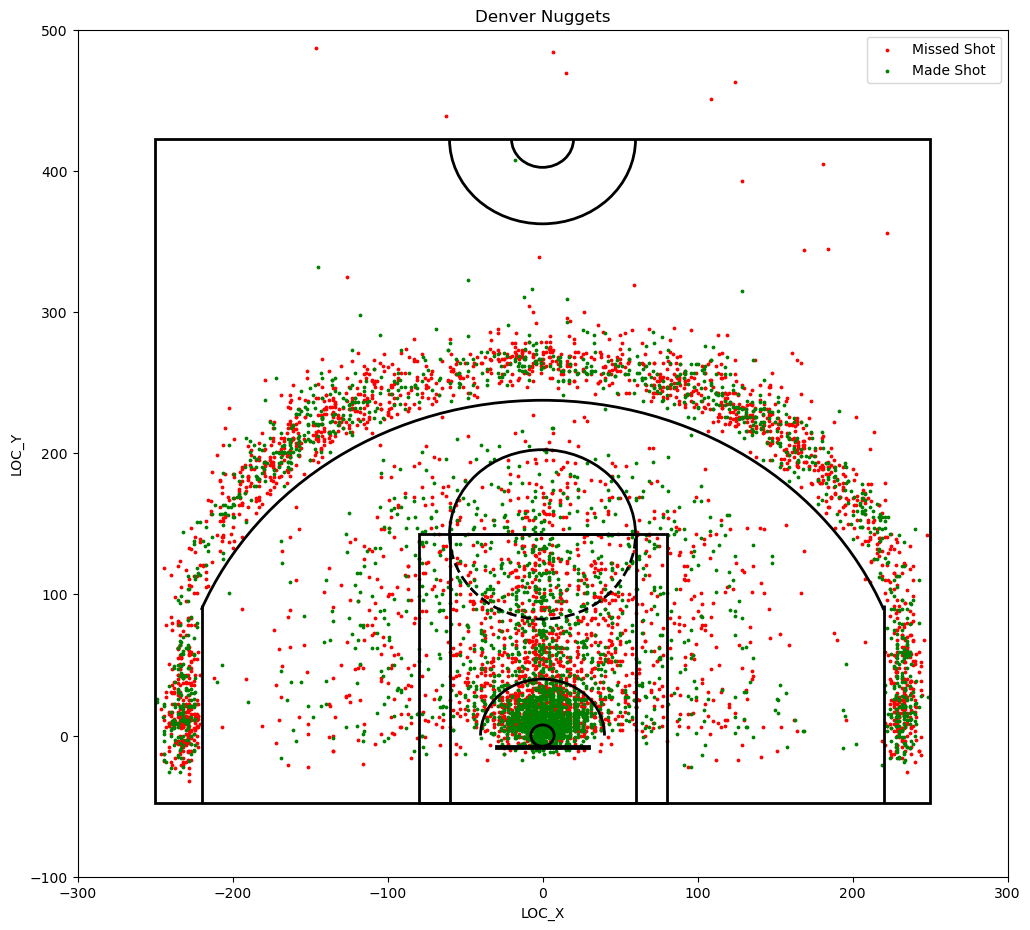

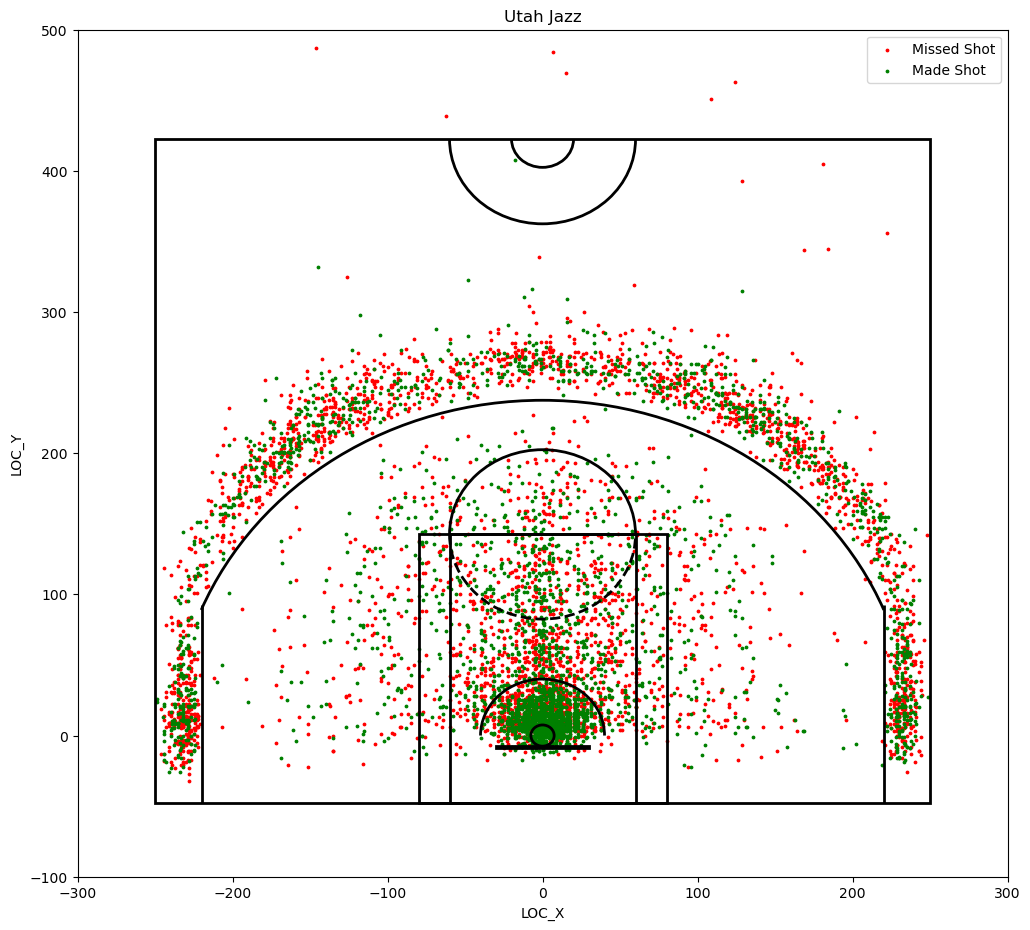

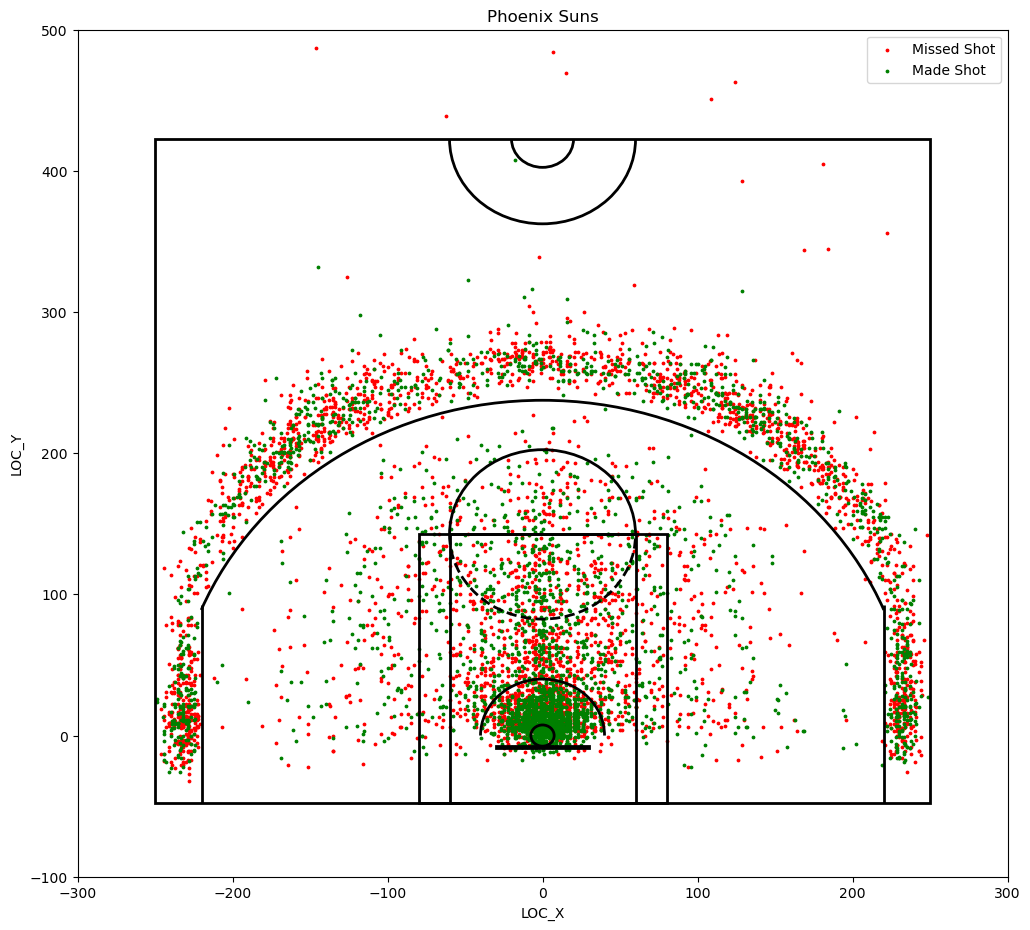

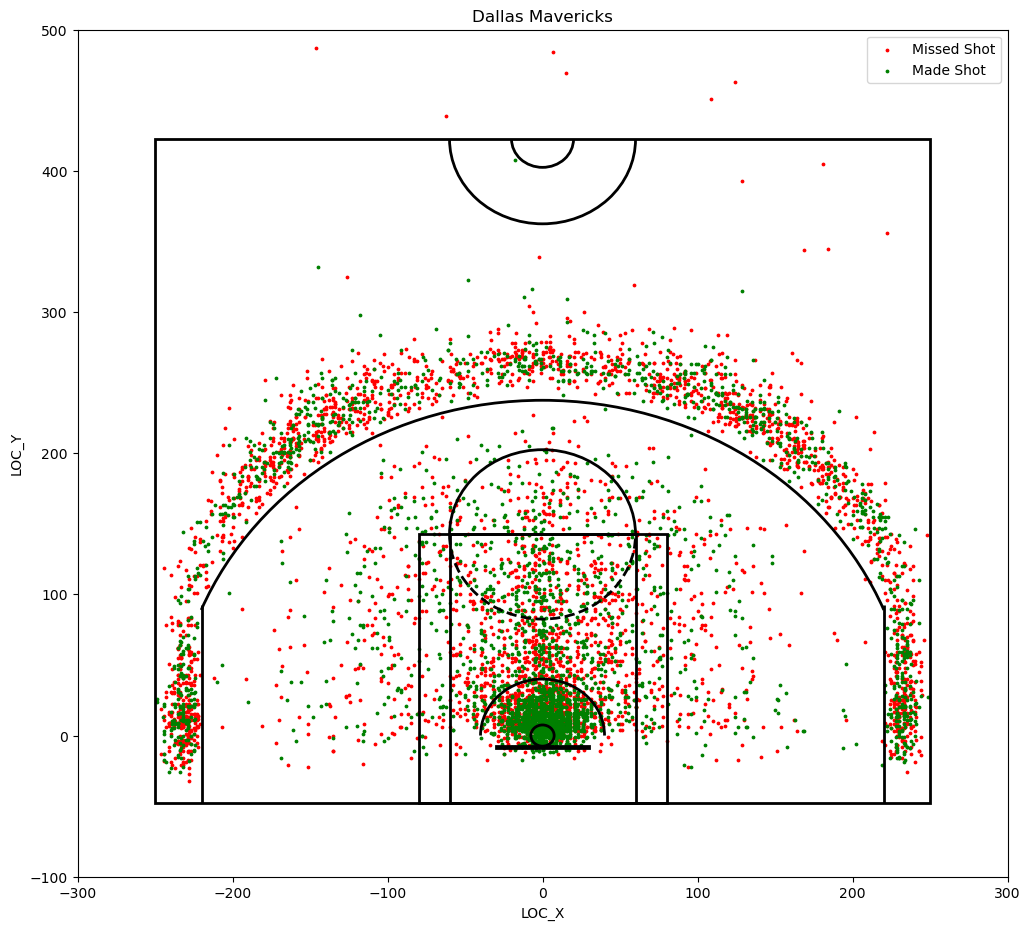

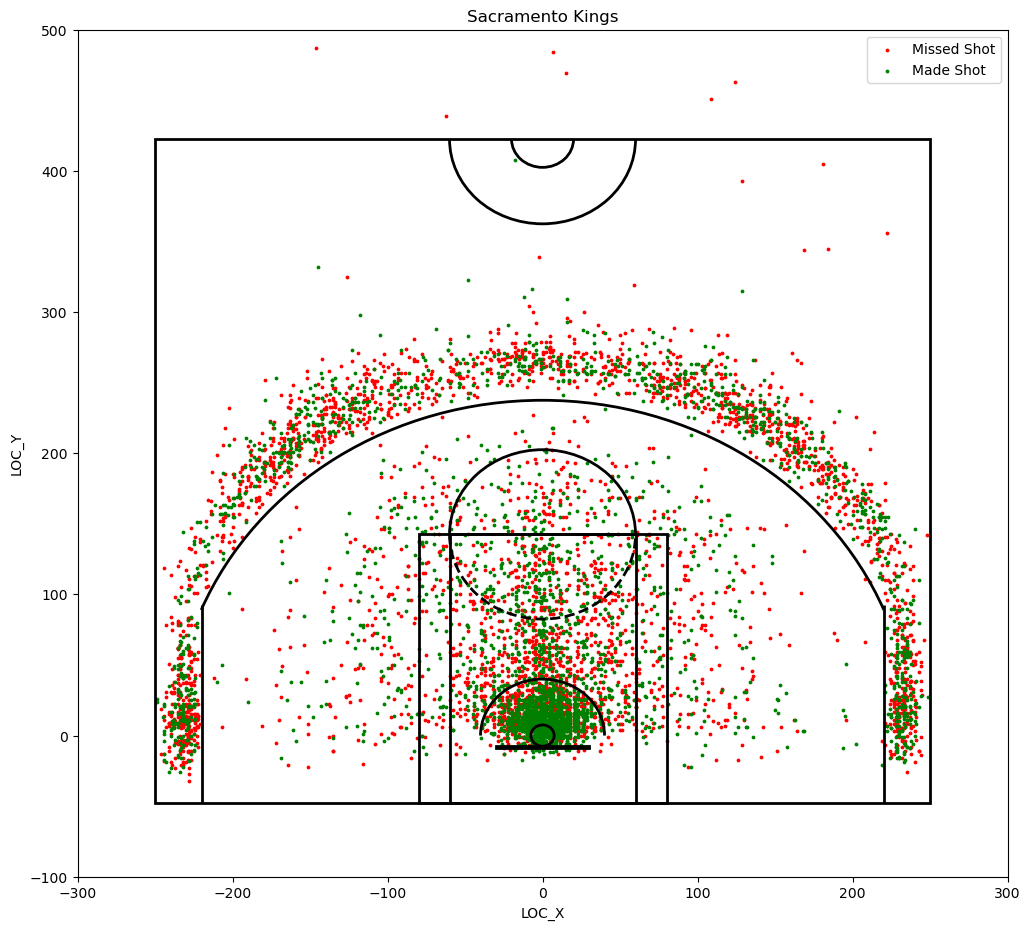

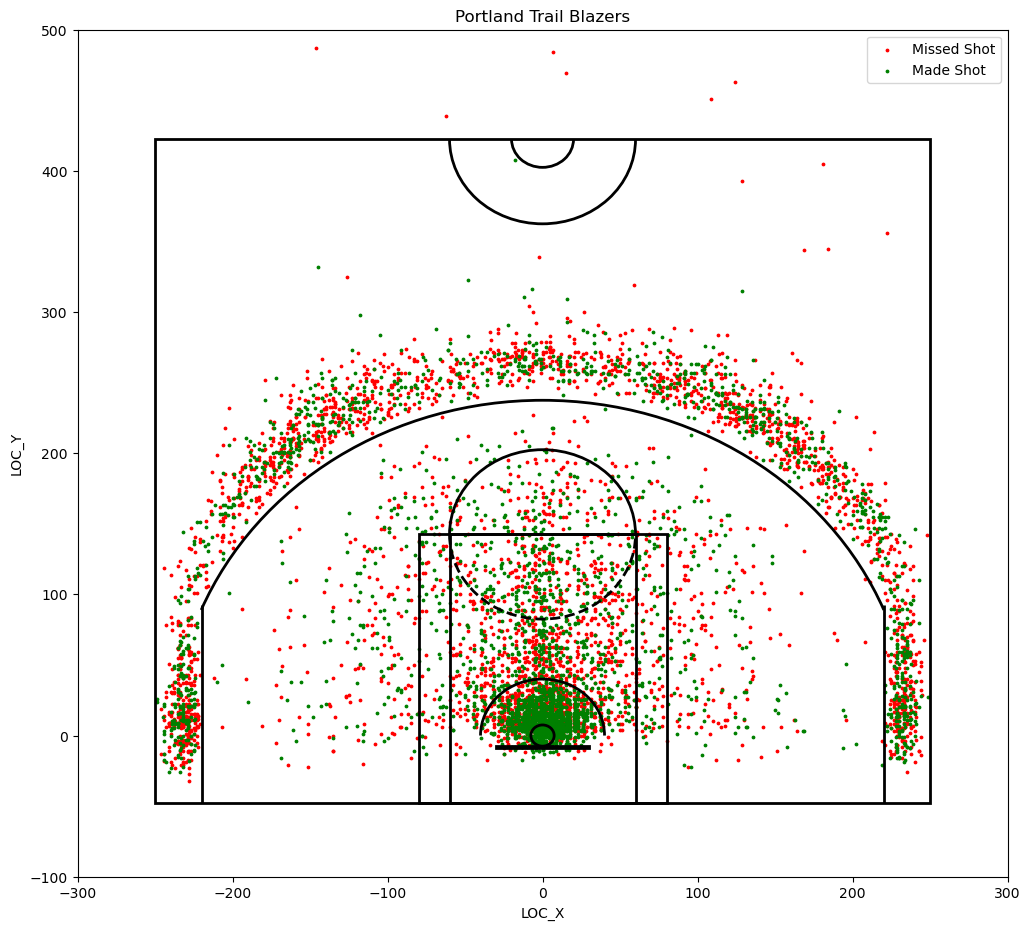

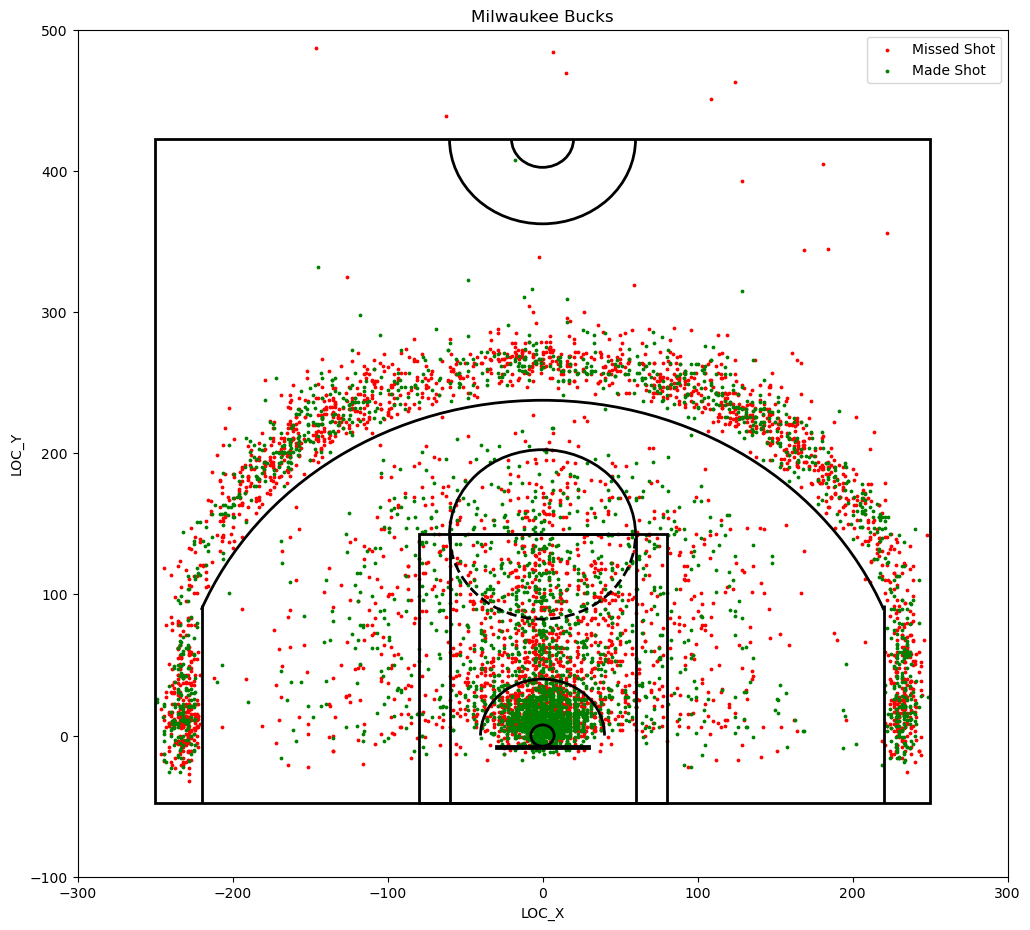

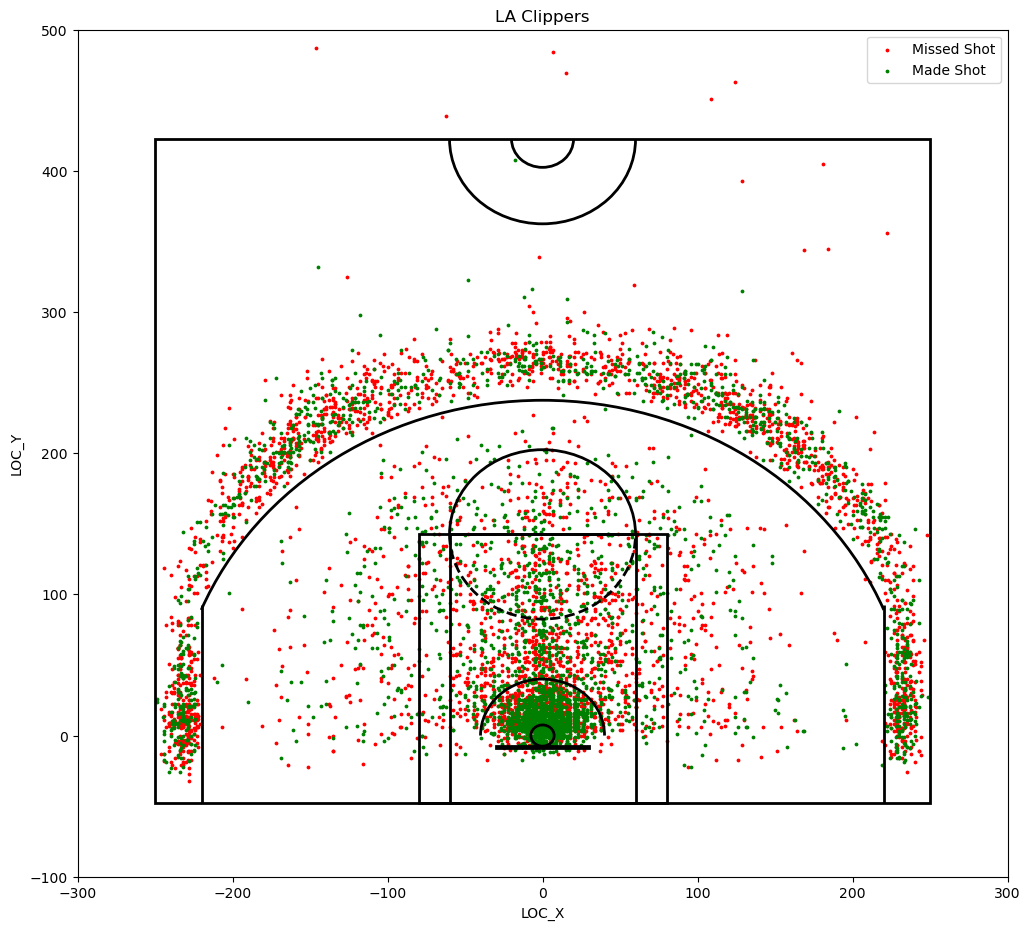

In [14]:
# Get unique teams
unique_teams = df['TEAM_NAME'].unique()

for team in unique_teams:
    # Create a subset dataframe for the current player
    team_df = df[df['TEAM_NAME'] == player]
    
    plt.figure(figsize=(12, 11))
    plt.title(team)

    # Filter dataframe for "Missed Shot" and plot for the current player
    missed_shot = team_df[team_df['EVENT_TYPE'] == 'Missed Shot']
    plt.scatter(missed_shot.LOC_X, missed_shot.LOC_Y, s=3, c='red', label='Missed Shot')

    # Filter dataframe for "Made Shot" and plot for the current player
    made_shot = team_df[team_df['EVENT_TYPE'] == 'Made Shot']
    plt.scatter(made_shot.LOC_X, made_shot.LOC_Y, s=3, c='green', label='Made Shot')
    
    # Draw Court
    draw_court(outer_lines=True)
    
    # Set the axis limits
    plt.xlim(-300, 300)
    plt.ylim(-100, 500)
    
    # Set x and y axis labels
    plt.xlabel('LOC_X')
    plt.ylabel('LOC_Y')

    # Display legend
    plt.legend()

    # Show the plot
    plt.show()

### Streamlit